## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Get the data

In [2]:
df = pd.read_csv('Prod dataset 20210728.xlsx - Raw data.csv')
df.head()

,timestamp,lat,lon,temperature,atpressure,cloudiness,rain,windspeed,Relationship,job,...,Previous 10 days,Total Sleep (minutes),Min of heartRate,Max of heartRate,Average of heartRate,steps,distance,runDistance,calories,TARGET (Happiness)
0,5/12/21 0:36,38.924006,1.455704,17.42,1020,0,NaN,7.00,5,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,5/12/21 11:42,38.916601,1.420973,20.35,1017,0,NaN,7.20,3,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,5/12/21 14:47,38.922613,1.461175,21.33,1016,0,NaN,6.17,4,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,5/12/21 17:48,38.922609,1.461175,19.80,1014,20,NaN,5.36,4,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,5/12/21 20:54,38.922606,1.461176,18.06,1014,20,NaN,4.47,5,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              403 non-null    object 
 1   lat                    403 non-null    float64
 2   lon                    403 non-null    float64
 3   temperature            403 non-null    float64
 4   atpressure             403 non-null    int64  
 5   cloudiness             403 non-null    int64  
 6   rain                   0 non-null      float64
 7   windspeed              403 non-null    float64
 8   Relationship           403 non-null    int64  
 9   job                    182 non-null    float64
 10  social                 403 non-null    int64  
 11  Refresh                398 non-null    float64
 12  dow                    403 non-null    object 
 13  date                   403 non-null    object 
 14  day slot               403 non-null    object 
 15  Provin

In [6]:
df.columns

Index(['timestamp', 'lat', 'lon', 'temperature', 'atpressure', 'cloudiness',
       'rain', 'windspeed', 'Relationship', 'job', 'social', 'Refresh', 'dow',
       'date', 'day slot', 'Province', 'District', ' Previous 1 days',
       ' Previous 3 days', ' Previous 6 days', ' Previous 10 days',
       'TARGET (Happiness)'],
      dtype='object')

In [8]:
df.shape

(403, 30)

In [9]:
df.describe()

,lat,lon,temperature,atpressure,cloudiness,rain,windspeed,Relationship,job,social,Refresh,Total Sleep (minutes),Min of heartRate,Max of heartRate,Average of heartRate,steps,distance,runDistance,calories,TARGET (Happiness)
count,403.000000,403.000000,403.000000,403.000000,403.000000,0.0,403.000000,403.000000,182.000000,403.000000,398.000000,115.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,403.000000
mean,39.697781,-0.951085,23.244268,1015.461538,20.362283,NaN,2.715980,3.565757,2.939560,2.945409,2.798995,379.808696,47.422764,114.252033,72.704878,4468.186992,3111.682927,304.634146,111.056911,3.560794
std,0.976254,2.810598,4.111788,4.528559,26.858812,NaN,1.644889,1.147144,0.435542,0.616520,0.941513,121.393004,3.454643,5.745409,5.039871,1817.656911,1288.903991,132.164966,42.570732,0.848265
min,38.875838,-8.221469,10.460000,993.000000,0.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,76.000000,41.000000,104.000000,61.700000,1598.000000,1095.000000,92.000000,39.000000,1.000000
25%,38.922611,-3.696655,20.580000,1013.000000,0.000000,NaN,1.340000,3.000000,3.000000,3.000000,2.000000,338.500000,46.000000,111.000000,68.300000,3132.000000,2134.000000,222.000000,76.000000,3.000000
50%,38.970934,1.422942,23.770000,1016.000000,14.000000,NaN,2.680000,4.000000,3.000000,3.000000,3.000000,379.000000,47.000000,113.000000,72.400000,4282.000000,2982.000000,288.000000,107.000000,4.000000
75%,40.478944,1.461167,25.980000,1018.000000,20.000000,NaN,3.580000,4.000000,3.000000,3.000000,3.000000,464.000000,48.000000,115.000000,76.600000,5389.000000,3761.000000,387.000000,131.000000,4.000000
max,43.280962,1.581316,33.090000,1026.000000,100.000000,NaN,11.550000,5.000000,4.000000,4.000000,5.000000,559.000000,56.000000,127.000000,80.700000,8603.000000,6024.000000,724.000000,205.000000,5.000000


In [10]:
df.rename(columns={'TARGET (Happiness)': 'target', 'Refresh': 'refresh'}, inplace=True)

In [11]:
df['refresh'].median()

3.0

In [12]:
df['refresh'].fillna(3, inplace=True)

In [13]:
df['refresh'] = df['refresh'].astype(int)

# Let's work on personal traits and TARGET

In [14]:
df.columns

Index(['timestamp', 'lat', 'lon', 'temperature', 'atpressure', 'cloudiness',
       'rain', 'windspeed', 'Relationship', 'job', 'social', 'refresh', 'dow',
       'date', 'day slot', 'Province', 'District', ' Previous 1 days',
       ' Previous 3 days', ' Previous 6 days', ' Previous 10 days',
       'Total Sleep (minutes)', 'Min of heartRate', 'Max of heartRate',
       ' Average of heartRate', ' steps', ' distance', ' runDistance',
       ' calories', 'target'],
      dtype='object')

In [15]:
df['job'].unique()

array([nan,  2.,  3.,  4.,  1.])

In [16]:
df['job'].fillna(0, inplace=True)

In [17]:
df['job'] = df['job'].astype(int)

Job column doesn't seem to yield better results as it has a lot of NULL values.

In [18]:
df_numerical = df[['timestamp', 'Relationship', 'social', 'refresh', 'target', 'atpressure']].copy()

In [19]:
df_numerical.head()

,timestamp,Relationship,social,refresh,target,atpressure
0,5/12/21 0:36,5,2,3,5,1020
1,5/12/21 11:42,3,3,3,4,1017
2,5/12/21 14:47,4,2,3,4,1016
3,5/12/21 17:48,4,3,3,5,1014
4,5/12/21 20:54,5,3,3,4,1014


In [20]:
df_numerical.isnull().sum()

timestamp       0
Relationship    0
social          0
refresh         0
target          0
atpressure      0
dtype: int64

In [21]:
df_numerical['social']

0      2
1      3
2      2
3      3
4      3
      ..
398    4
399    4
400    4
401    4
402    4
Name: social, Length: 403, dtype: int64

In [22]:
df_numerical.head()

,timestamp,Relationship,social,refresh,target,atpressure
0,5/12/21 0:36,5,2,3,5,1020
1,5/12/21 11:42,3,3,3,4,1017
2,5/12/21 14:47,4,2,3,4,1016
3,5/12/21 17:48,4,3,3,5,1014
4,5/12/21 20:54,5,3,3,4,1014


In [23]:
df_numerical.isnull().sum()

timestamp       0
Relationship    0
social          0
refresh         0
target          0
atpressure      0
dtype: int64

In [24]:
df_numerical.dtypes

timestamp       object
Relationship     int64
social           int64
refresh          int64
target           int64
atpressure       int64
dtype: object

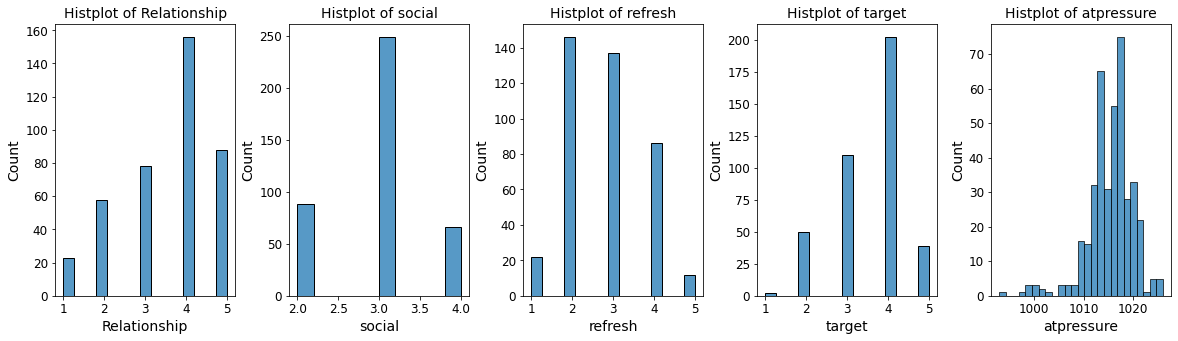

In [25]:
plt.figure(1, figsize=(20, 5))
n = 0
for x in df_numerical.columns[1:]:
    n += 1
    plt.subplot(1, 5, n)
    sns.histplot(df_numerical[x])
    plt.title('Histplot of {}'.format(x), fontsize=14)
plt.subplots_adjust(wspace=0.3)
plt.show()

Saving figure histplot of features


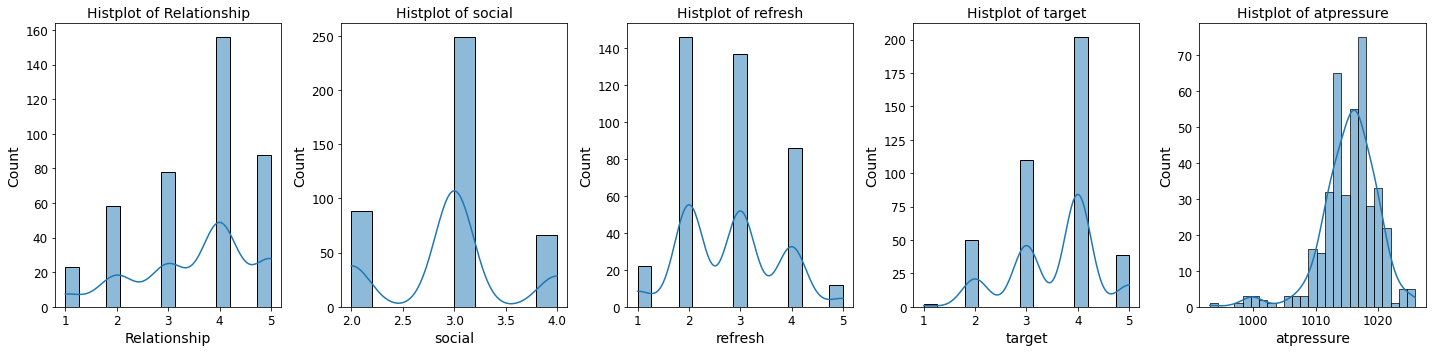

In [26]:
plt.figure(1, figsize=(20, 5))
n = 0
for x in df_numerical.columns[1:]:
    n += 1
    plt.subplot(1, 5, n)
    sns.histplot(df_numerical[x], kde=True)
    plt.title('Histplot of {}'.format(x), fontsize=14)
plt.subplots_adjust(wspace=0.3)
save_fig('histplot of features')
plt.show()

In [27]:
df_numerical.columns

Index(['timestamp', 'Relationship', 'social', 'refresh', 'target',
       'atpressure'],
      dtype='object')

In [28]:
df_numerical['target'].value_counts()

4    202
3    110
2     50
5     39
1      2
Name: target, dtype: int64

Creating exponentially weighted moving average:

In [29]:
smooth_df = df_numerical.copy()
smooth_df.head()

,timestamp,Relationship,social,refresh,target,atpressure
0,5/12/21 0:36,5,2,3,5,1020
1,5/12/21 11:42,3,3,3,4,1017
2,5/12/21 14:47,4,2,3,4,1016
3,5/12/21 17:48,4,3,3,5,1014
4,5/12/21 20:54,5,3,3,4,1014


In [30]:
vi = 0
beta = 0.9
for i in df_numerical.index:
    vi = beta * vi + (1-beta) * df_numerical.iloc[i, 1:]
    smooth_df.iloc[i, 1:] = vi / (1-beta**(i+1))

In [31]:
smooth_df

,timestamp,Relationship,social,refresh,target,atpressure
0,5/12/21 0:36,5.000000,2.000000,3.000000,5.000000,1020.000000
1,5/12/21 11:42,3.947368,2.526316,3.000000,4.473684,1018.421053
2,5/12/21 14:47,3.966790,2.332103,3.000000,4.298893,1017.527675
3,5/12/21 17:48,3.976447,2.526316,3.000000,4.502762,1016.501890
4,5/12/21 20:54,4.226393,2.641987,3.000000,4.379991,1015.890943
...,...,...,...,...,...,...
398,7/26/21 10:30,4.260958,3.827288,2.596362,3.913472,1012.410225
399,7/26/21 12:24,4.334862,3.844559,2.736726,4.022125,1012.769202
400,7/26/21 14:09,4.401376,3.860103,2.863053,4.119912,1013.092282
401,7/26/21 16:29,4.461238,3.874093,3.076748,4.107921,1013.383054


Saving figure Exponentially weighted average of features


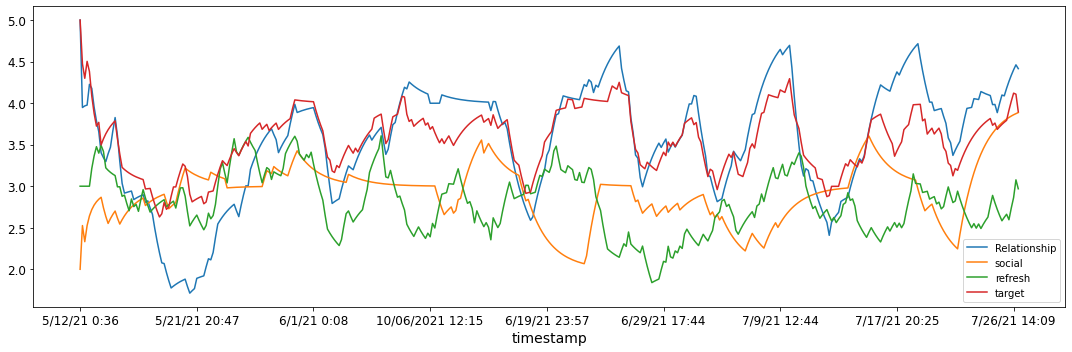

In [32]:
smooth_df.plot('timestamp', ['Relationship', 'social', 'refresh', 'target'], figsize=(15, 5))
save_fig('Exponentially weighted average of features')
plt.show()

Trying to smooth this plot by using exponentially weighted moving averages:

In [33]:
# from datetime import datetime
# df['timestamp'] = [datetime.strptime(df.timestamp[0], '%m/%d/%y %H:%M') for x in df['timestamp']]

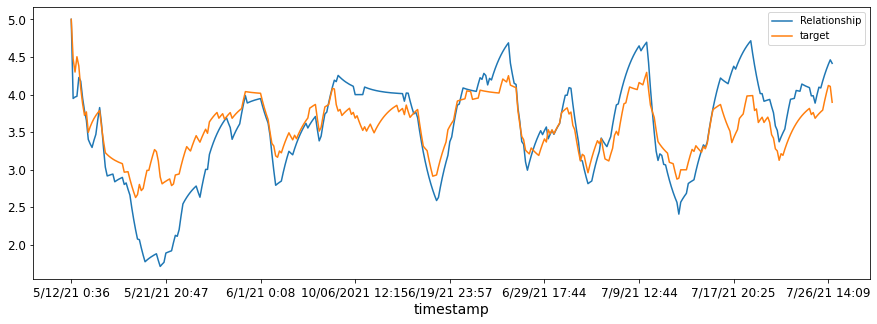

In [34]:
smooth_df.plot('timestamp', ['Relationship', 'target'], figsize=(15, 5))
plt.show()

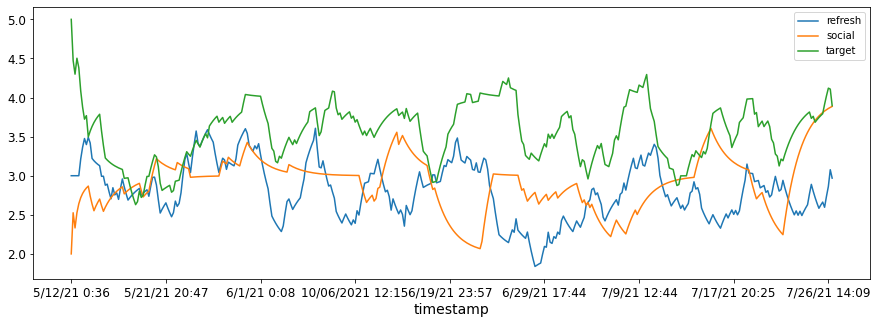

In [35]:
smooth_df.plot('timestamp', ['refresh', 'social', 'target'], figsize=(15, 5))
plt.show()

In [36]:
#Let's split the data into train and test set before doing further analysis
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, random_state = 42, test_size=0.1)

In [37]:
df_numerical = train_set[['timestamp', 'Relationship', 'social', 'refresh', 'atpressure', 'target']].copy()

In [38]:
corr_matrix = df_numerical.corr()
corr_matrix['target'].sort_values(ascending=False)

target          1.000000
Relationship    0.727232
refresh         0.320728
social          0.184670
atpressure      0.166847
Name: target, dtype: float64

In [39]:
corr_target = corr_matrix.loc[['target']]
corr_target

,Relationship,social,refresh,atpressure,target
target,0.727232,0.18467,0.320728,0.166847,1.0


Saving figure correlation_of_features


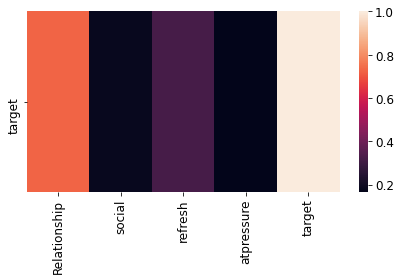

In [40]:
sns.heatmap(corr_target)
save_fig(('correlation_of_features'))
plt.show()

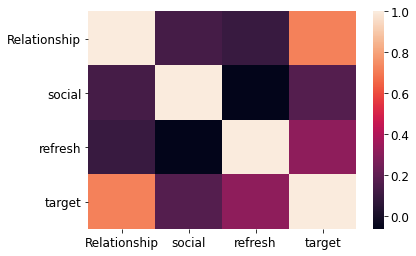

In [41]:
sns.heatmap(df[['Relationship', 'social', 'refresh', 'target']].corr())
plt.show()

In [42]:
df['target'].value_counts()

4    202
3    110
2     50
5     39
1      2
Name: target, dtype: int64

## Preparing the data for machine learning algorithms

In [57]:
np.array([[1, 3, 4, 1004]]).shape

(1, 4)

In [58]:
X_train, X_test = np.asanyarray(train_set[['Relationship', 'social', 'refresh', 'atpressure']]), np.asanyarray(test_set[['Relationship', 'social', 'refresh', 'atpressure']])
y_train, y_test = np.asanyarray(train_set['target']), np.asanyarray(test_set['target'])

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train_prepared = pipeline.fit_transform(X_train)

In [45]:
X_train_prepared.shape

(362, 4)

In [46]:
X_train_prepared[0]

array([ 1.26190357,  0.07656027, -0.85409932, -0.34430804])

In [47]:
X_test_prepared = pipeline.transform(X_test)

## Select and Train a model

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [45]:
#let's trying predicting some `target` values using the model
some_data = X_train_prepared[:5]
some_labels = y_train[:5]
print("Predictions", lin_reg.predict(some_data))

Predictions [4.0493523  3.4169718  4.07788013 3.00828193 2.58134906]


Compare against the actual values:

In [46]:
list(some_labels)

[4, 2, 4, 3, 3]

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = lin_reg.predict(X_train_prepared)
lin_rmse = mean_squared_error(y_train, y_pred, squared=False)
print(lin_rmse)
print(r2_score(y_train, y_pred))

0.5211827377492533
0.6096109758020144


In [48]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class='multinomial', max_iter=2000)
log_clf.fit(X_train_prepared, y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [49]:
#let's trying predicting some `target` values using the model
some_data = X_train_prepared[:10]
some_labels = y_train[:10]
print("Predictions", log_clf.predict(some_data))

Predictions [4 3 4 3 2 3 3 4 4 4]


In [50]:
#compare against the actual values
list(some_labels)

[4, 2, 4, 3, 3, 3, 3, 3, 5, 4]

In [51]:
performance = {}
performance['log_clf'] = log_clf.score(X_train_prepared, y_train)

In [52]:
performance_test = {}
performance_test['log_clf'] = log_clf.score(X_test_prepared, y_test)

In [53]:
from sklearn.metrics import mean_absolute_error

y_pred = log_clf.predict(X_train_prepared)
log_mae = mean_absolute_error(y_train, y_pred)
log_mae

0.32320441988950277

### Decision Tree Classifier

In [54]:
{'max_depth': 6, 'max_features': 3}

{'max_depth': 6, 'max_features': 3}

In [55]:
#Classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_features=3, max_depth=6)
tree_clf.fit(X_train_prepared, y_train)

DecisionTreeClassifier(max_depth=6, max_features=3)

In [56]:
#let's trying predicting some `target` values using the model
some_data = X_train_prepared[:20]
some_labels = y_train[:20]
print("Predictions", tree_clf.predict(some_data))

Predictions [4 2 4 3 3 3 3 4 4 4 4 3 1 4 4 4 4 2 3 3]


In [57]:
#compare against the actual values
list(some_labels)

[4, 2, 4, 3, 3, 3, 3, 3, 5, 4, 3, 3, 2, 3, 4, 5, 3, 4, 3, 3]

In [58]:
from sklearn.metrics import mean_absolute_error

y_pred = tree_clf.predict(X_train_prepared)
tree_mae = mean_absolute_error(y_train, y_pred)
tree_mae

0.2513812154696133

In [59]:
performance['decision_tree'] = tree_clf.score(X_train_prepared, y_train)

In [60]:
from sklearn.metrics import f1_score

tree_f1 = f1_score(y_train, y_pred, average='weighted')
tree_f1

0.7510749972018301

In [61]:
tree_clf.get_depth()

6

In [62]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, 'tree.dot'),
    feature_names=df_numerical.columns[1:5],
    rounded=True,
    filled=True
)

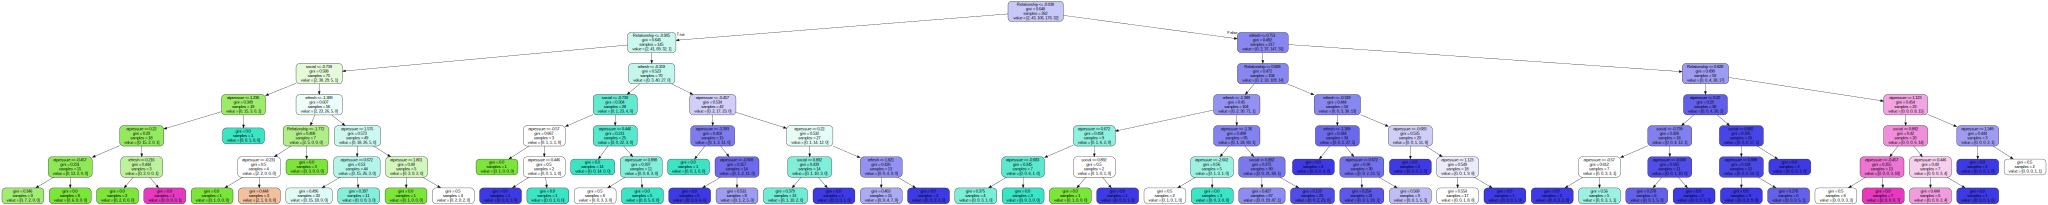

In [63]:
from graphviz import Source

Source.from_file(os.path.join(IMAGES_PATH, 'tree.dot'))

In [64]:
df_numerical[['target']].value_counts()

target
4         179
3         106
2          43
5          32
1           2
dtype: int64

In [65]:
!dot -Tpng ./images/tree.dot -o tree.png

In [66]:
# y_pred = tree_reg.predict(X_train_prepared)
# rmse = mean_squared_error(y_train, y_pred, squared=False)
# rmse

In [67]:
# r2_score(y_train, y_pred)

**Better evaluation using cross validation**

In [68]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, X_train_prepared, y_train, scoring='f1_weighted', cv=5)

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [69]:
def display_scores(scores, model):
    print('Scores', scores)
    print('Mean:', scores.mean())
    print('Std:', scores.std())
    performance_test[model] = scores.mean()
display_scores(tree_scores, 'decision_tree')

Scores [0.58478426 0.68946058 0.63087626 0.5805275  0.48406714]
Mean: 0.5939431474113711
Std: 0.0675636523662465


### SVM

In [70]:
from sklearn.svm import SVC

svm_clf = SVC(C=1, probability=True)
svm_clf.fit(X_train_prepared, y_train)

SVC(C=1, probability=True)

In [71]:
svm_clf.support_vectors_

array([[-2.20533812,  0.07656027, -1.92393999, -0.11851183],
       [-2.20533812,  0.07656027, -1.92393999,  0.10728439],
       [ 0.39509315,  0.07656027, -1.92393999,  0.78467304],
       ...,
       [ 1.26190357,  0.07656027, -0.85409932,  1.01046926],
       [ 1.26190357,  1.7068436 ,  1.28558202,  0.10728439],
       [-1.3385277 , -1.55372307,  1.28558202,  0.33308061]])

In [72]:
len(svm_clf.decision_function(X_train_prepared))

362

In [73]:
y_pred = svm_clf.predict(X_train_prepared)
f1_score(y_train, y_pred, average='weighted')

0.7078297973665484

In [74]:
performance['SVM'] = svm_clf.score(X_train_prepared, y_train)

**Better evaluation using cross validation**

In [75]:
from sklearn.model_selection import cross_val_score

svc_scores = cross_val_score(svm_clf, X_train_prepared, y_train, scoring='f1_weighted', cv=5)
display_scores(svc_scores, model='SVM')

Scores [0.55439937 0.65055667 0.68465036 0.63055556 0.55913726]
Mean: 0.6158598429044299
Std: 0.051277304713360186


/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [76]:
lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_squares = np.sqrt(-lin_scores)
# display_scores(lin_rmse_squares)

In [77]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=5)
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [78]:
forest_reg.score(X_train_prepared, y_train)

0.6932802423259857

### Ensemble Learning

In [79]:
{'max_depth': 12, 'max_features': 2, 'n_estimators': 30}

{'max_depth': 12, 'max_features': 2, 'n_estimators': 30}

In [80]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, n_estimators=30, max_depth=12, max_features=2, n_jobs=-1)
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(max_depth=12, max_features=2, n_estimators=30, n_jobs=-1,
                       random_state=42)

In [81]:
forest_clf.predict(some_data)

array([4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 3, 3, 2, 3, 4, 5, 3, 2, 2, 3])

In [82]:
some_labels

array([4, 2, 4, 3, 3, 3, 3, 3, 5, 4, 3, 3, 2, 3, 4, 5, 3, 4, 3, 3])

In [83]:
performance['forest_clf'] = forest_clf.score(X_train_prepared, y_train)

In [84]:
y_pred = forest_clf.predict(X_train_prepared)
forest_mae = mean_absolute_error(y_pred, y_train)
forest_mae

0.13259668508287292

In [85]:
f1_score(y_pred, y_train, average='weighted')

0.8815478992976504

In [86]:
forest_scores = cross_val_score(forest_clf, X_train_prepared, y_train,
                            scoring='f1_weighted', cv=5)
# forest_rmse_squares = np.sqrt(-forest_scores)
display_scores(forest_scores, model='forest_clf')

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Scores [0.55903056 0.70375334 0.71435089 0.71014493 0.64769147]
Mean: 0.6669942369764075
Std: 0.05913479431549506


In [87]:
pd.Series(forest_scores).describe()

count    5.000000
mean     0.666994
std      0.066115
min      0.559031
25%      0.647691
50%      0.703753
75%      0.710145
max      0.714351
dtype: float64

In [88]:
forest_clf.feature_importances_

array([0.34726316, 0.1172614 , 0.16548715, 0.36998829])

In [89]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees_clf = ExtraTreesClassifier(max_depth=12, max_features=2, n_estimators=30, random_state=42)
extra_trees_clf.fit(X_train_prepared, y_train)

ExtraTreesClassifier(max_depth=12, max_features=2, n_estimators=30,
                     random_state=42)

In [90]:
extra_trees_clf.score(X_train_prepared, y_train)

0.8812154696132597

In [91]:
extra_trees_clf.predict(some_data)

array([4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 3, 3, 2, 3, 4, 4, 3, 2, 2, 3])

In [92]:
some_labels

array([4, 2, 4, 3, 3, 3, 3, 3, 5, 4, 3, 3, 2, 3, 4, 5, 3, 4, 3, 3])

In [93]:
y_pred = extra_trees_clf.predict(X_train_prepared)
extra_clf_mae = mean_absolute_error(y_pred, y_train)
extra_clf_mae

0.1270718232044199

In [94]:
f1_score(y_pred, y_train, average='weighted')

0.8842804398542886

In [95]:
grad_scores = cross_val_score(extra_trees_clf, X_train_prepared, y_train,
                            scoring='f1_weighted', cv=5)
# forest_rmse_squares = np.sqrt(-forest_scores)
# display_scores(grad_scores)

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [96]:
# from sklearn.ensemble import VotingClassifier

# voting_clf = VotingClassifier(
#     estimators=[('rf', forest_clf), ('svc', svm_clf)],
#     voting='soft'
# )
# voting_clf.fit(X_train_prepared, y_train)

In [97]:
# from sklearn.metrics import accuracy_score
# for clf in (log_clf, forest_clf, voting_clf):
#     clf.fit(X_train_prepared, y_train)
#     y_pred = clf.predict(X_train_prepared)
#     print(clf.__class__.__name__, f1_score(y_train, y_pred, average='weighted'))

In [98]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        max_features=2),
                  max_samples=0.9, n_estimators=20, n_jobs=-1, oob_score=True)

NameError: name 'BaggingClassifier' is not defined

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=10, max_features=2), n_estimators=20,
    max_samples=0.8, bootstrap=True, n_jobs=-1, oob_score=True, 
)
bag_clf.fit(X_train_prepared, y_train)
y_pred = bag_clf.predict(X_train_prepared)

In [100]:
bag_clf.oob_score_

0.6270718232044199

In [101]:
bag_clf.oob_decision_function_

array([[0.        , 0.        , 0.09090909, 0.65151515, 0.25757576],
       [0.        , 0.        , 0.6       , 0.4       , 0.        ],
       [0.        , 0.        , 0.08333333, 0.91666667, 0.        ],
       ...,
       [0.        , 0.54545455, 0.27272727, 0.18181818, 0.        ],
       [0.        , 0.        , 0.2       , 0.725     , 0.075     ],
       [0.        , 0.        , 1.        , 0.        , 0.        ]])

In [102]:
performance['bag_clf'] = bag_clf.score(X_train_prepared, y_train)

In [103]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))

0.8591160220994475


In [104]:
f1_score(y_train, y_pred, average='weighted')

0.8581069631879741

In [105]:
bag_svm_clf = BaggingClassifier(
    SVC(), n_estimators=500,
    max_samples=0.7, bootstrap=True,
)
bag_svm_clf.fit(X_train_prepared, y_train)
y_pred = bag_svm_clf.predict(X_train_prepared)

In [106]:
bag_svm_clf.score(X_train_prepared, y_train)

0.7154696132596685

In [107]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=12), n_estimators=30,
    algorithm='SAMME.R', learning_rate = 0.4, random_state=42,
)
ada_clf.fit(X_train_prepared, y_train)
y_pred = ada_clf.predict(X_train_prepared)

In [108]:
performance['ada_clf'] = ada_clf.score(X_train_prepared, y_train)

In [109]:
f1_score(y_pred, y_train, average='weighted')

0.8826412244216245

Better evaluation using cross validation

In [110]:
bag_scores = cross_val_score(bag_svm_clf, X_train_prepared, y_train,
                            scoring='f1_weighted', cv=5)
# forest_rmse_squares = np.sqrt(-forest_scores)
# display_scores(bag_scores)

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [111]:
bag_scores = cross_val_score(bag_clf, X_train_prepared, y_train,
                            scoring='f1_weighted', cv=10)
# forest_rmse_squares = np.sqrt(-forest_scores)
display_scores(bag_scores, 'bag_clf')

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Scores [0.49175149 0.58861004 0.79801587 0.60171261 0.51881614 0.66229584
 0.64871984 0.56448413 0.55873016 0.54134065]
Mean: 0.5974476767642908
Std: 0.0838130395026482


In [112]:
ada_scores = cross_val_score(ada_clf, X_train_prepared, y_train,
                            scoring='f1_weighted', cv=5)
# forest_rmse_squares = np.sqrt(-forest_scores)
display_scores(ada_scores, 'ada_clf')

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Scores [0.54979311 0.6757118  0.58687424 0.67935862 0.60230634]
Mean: 0.6188088183581799
Std: 0.05091079365930409


In [113]:
{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 300}

{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 300}

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

grad_clf = GradientBoostingClassifier(max_depth=7, n_estimators=300, learning_rate=0.5, random_state=42)
grad_clf.fit(X_train_prepared, y_train)
y_pred = grad_clf.predict(X_train_prepared)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(max_depth=7, n_estimators=100, learning_rate=0.1, random_state=42)
grad_reg.fit(X_train_prepared, y_train)
y_pred_reg = grad_reg.predict(X_train_prepared)

In [116]:
performance['grad_clf'] = grad_clf.score(X_train_prepared, y_train)

In [117]:
grad_reg.score(X_train_prepared, y_train)

0.872241720780704

In [118]:
f1_score(y_pred, y_train, average='weighted')

0.8820541290341835

In [119]:
grad_scores = cross_val_score(grad_clf, X_train_prepared, y_train,
                            scoring='f1_weighted', cv=5)
# forest_rmse_squares = np.sqrt(-forest_scores)
display_scores(grad_scores, 'grad_clf')

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Scores [0.57738331 0.7494485  0.69706297 0.68252455 0.57057226]
Mean: 0.6553983155362919
Std: 0.07014130601031687


In [120]:
grad_clf.predict(some_data)

array([4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 3, 3, 2, 3, 5, 5, 3, 2, 2, 3])

In [ ]:
grad_reg.predict(some_data)

In [ ]:
some_labels

In [ ]:
grad_clf.predict(X_test_prepared)

In [ ]:
grad_reg.predict(X_test_prepared)

In [ ]:
ada_clf.predict(X_test_prepared)

In [ ]:
y_test

## Fine-tune Model

GridSearch

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [1, 2, 3, 4], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 18]},
]

tree_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_clf, param_grid,
                          scoring='f1_weighted',
                          return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16,
                                        18],
                          'max_features': [1, 2, 3, 4]}],
             return_train_score=True, scoring='f1_weighted')

In [83]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 3}

In [84]:
grid_search.best_score_

0.643161639635091

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 20, 30, 60, 70, 80, 90, 100, 200, 300], 'max_features': [1, 2, 3, 4], 'max_depth': [4, 6, 7, 8, 10, 12, 14, 18, 20]},
]

forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid,
                          scoring='f1_weighted',
                          return_train_score=True, cv=5)
grid_search.fit(X_train_prepared, y_train)

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [4, 6, 7, 8, 10, 12, 14, 18, 20],
                          'max_features': [1, 2, 3, 4],
                          'n_estimators': [5, 10, 20, 30, 60, 70, 80, 90, 100,
                                           200, 300]}],
             return_train_score=True, scoring='f1_weighted')

In [88]:
grid_search.best_params_

{'max_depth': 12, 'max_features': 2, 'n_estimators': 30}

In [89]:
grid_search.best_score_

0.6669942369764075

In [ ]:
forest_clf.feature_importances_

In [ ]:
param_grid = [
    {'n_estimators': [60, 70, 80, 90, 100, 200], 
     'max_depth': [6, 7, 8, 10, 12],
     'learning_rate': [1e-1, 1e-2, 5e-1]},
]
grad_clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(grad_clf,
                          param_grid=param_grid,
                          scoring='f1_weighted', verbose=1)
grid_search.fit(X_train_prepared, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 20, 30, 60, 70, 80, 90, 100, 200, 300], 'max_features': [1, 2, 3, 4], 'max_depth': [4, 6, 7, 8, 10, 12, 14]},
]

forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid,
                          scoring='f1_weighted',
                          return_train_score=True, cv=5)
grid_search.fit(X_train_prepared, y_train)

**Test set prediction**

In [186]:
bag_clf.oob_decision_function_[0]

array([0.    , 0.    , 0.125 , 0.8125, 0.0625])

In [187]:
bag_clf.score(X_test_prepared, y_test)

0.5853658536585366

In [188]:
forest_clf.score(X_test_prepared, y_test)

0.6341463414634146

In [189]:
grad_clf.score(X_test_prepared, y_test)

0.6341463414634146

In [190]:
y_pred = forest_clf.predict(X_test_prepared)
forest_test_score = f1_score(y_test, y_pred, average='weighted')
forest_test_score

0.615567439096851

In [191]:
y_pred

array([4, 3, 4, 2, 4, 4, 5, 4, 4, 4, 3, 3, 2, 4, 5, 4, 4, 4, 2, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 3, 3])

In [192]:
y_test

array([4, 2, 3, 2, 4, 4, 5, 4, 4, 2, 4, 3, 2, 4, 4, 4, 5, 4, 2, 4, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 3, 3, 2, 4, 4, 2])

# Let's work on environmental features and TARGET

In [ ]:
train_set.columns

In [ ]:
df.info()

We have no entry in rain column so not using that:

In [ ]:
df_env = train_set[['lat', 'lon', 'temperature', 'atpressure', 'cloudiness', 'windspeed', 'target']]
df_env.head()

## Visualize geographical data

visualizing target on lat and long spread in map

In [ ]:
df_env.describe()

In [ ]:
corr_matrix = df_env.corr()
corr_matrix['target'].sort_values(ascending=False)

In [ ]:
sns.heatmap(corr_matrix.loc[['target']])
plt.show()

In [ ]:
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
sns.pairplot(df_env[['temperature', 'atpressure', 'cloudiness', 'windspeed', 'target']], diag_kind='kde')
plt.show()

In [ ]:
df.columns

In [ ]:
df.corr()['target']

In [ ]:
df.job

In [ ]:
df.iloc[0]

In [ ]:
df.info()

In [ ]:
df[['dow', 'date',
       'day slot', 'Province', 'District', ' Previous 1 days',
       ' Previous 3 days', ' Previous 6 days', ' Previous 10 days']]


In [ ]:
float(df[' Previous 10 days'][0].strip())

- Job would have mattered but we have a lot of null values in there

In [ ]:
df[df['Total Sleep (minutes)'].notnull()].corr()['target']

In [ ]:
df[df['Total Sleep (minutes)'].isnull()].corr()['target']

Highest test accuracy: 66.5%<br>
Highest train accuracy: 90%

# Timeseries Forecasting

## Best model - `bag_clf`

In [49]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', pipeline),
    ('final_model', final_model)
])
full_pipeline_with_predictor.fit(X_train, y_train)


Pipeline(steps=[('preparation',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('final_model',
                 RandomForestClassifier(max_depth=12, max_features=2,
                                        n_estimators=30, n_jobs=-1,
                                        random_state=42))])

In [50]:
with open('model.pkl', 'wb') as file:
    pickle.dump(full_pipeline_with_predictor, file)

In [51]:
with open('model.pkl', 'rb') as file:
    final_model = pickle.load(file)
    
final_model

Pipeline(steps=[('preparation',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('final_model',
                 RandomForestClassifier(max_depth=12, max_features=2,
                                        n_estimators=30, n_jobs=-1,
                                        random_state=42))])

In [55]:
X_train[0][np.newaxis, :]

array([[   5,    3,    2, 1014]])

In [54]:
final_model.predict(X_train[0][np.newaxis, :])

array([4])

In [3]:
import pickle

In [2]:
filename = 'finalized_model.pkl'

In [131]:
with open(filename, 'wb') as file:
    pickle.dump(forest_clf, file)

In [4]:
with open(filename, 'rb') as file:
    final_model = pickle.load(file)
    
final_model

RandomForestClassifier(max_depth=12, max_features=2, n_estimators=30, n_jobs=-1,
                       random_state=42)

In [ ]:
X_tra

In [133]:
final_model.score(X_test_prepared, y_test)

0.6341463414634146

In [134]:
final_model.predict(X_test_prepared)

array([4, 3, 4, 2, 4, 4, 5, 4, 4, 4, 3, 3, 2, 4, 5, 4, 4, 4, 2, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 3, 3])

In [135]:
forest_clf.predict(X_test_prepared)

array([4, 3, 4, 2, 4, 4, 5, 4, 4, 4, 3, 3, 2, 4, 5, 4, 4, 4, 2, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 3, 3])

In [136]:
y_test

array([4, 2, 3, 2, 4, 4, 5, 4, 4, 2, 4, 3, 2, 4, 4, 4, 5, 4, 2, 4, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 3, 3, 2, 4, 4, 2])

In [137]:
performance['forest_clf'] = final_model.score(X_train_prepared, y_train)

In [138]:
performance

{'log_clf': 0.6850828729281768,
 'decision_tree': 0.7624309392265194,
 'SVM': 0.7265193370165746,
 'forest_clf': 0.8812154696132597,
 'bag_clf': 0.8453038674033149,
 'ada_clf': 0.8812154696132597,
 'grad_clf': 0.8812154696132597}

In [139]:
performance_test

{'log_clf': 0.5853658536585366,
 'decision_tree': 0.5939431474113711,
 'SVM': 0.6158598429044299,
 'forest_clf': 0.6669942369764075,
 'bag_clf': 0.5974476767642908,
 'ada_clf': 0.6188088183581799,
 'grad_clf': 0.6553983155362919}

In [142]:
pd.DataFrame(data={'train set': performance, 'test set': performance_test})

,train set,test set
log_clf,0.685083,0.585366
decision_tree,0.762431,0.593943
SVM,0.726519,0.615860
forest_clf,0.881215,0.666994
bag_clf,0.845304,0.597448
ada_clf,0.881215,0.618809
grad_clf,0.881215,0.655398


In [307]:
type(x)

int

In [310]:
train_score =[ value for key, value in performance]

ValueError: too many values to unpack (expected 2)

Saving figure Performance of each model for prediction


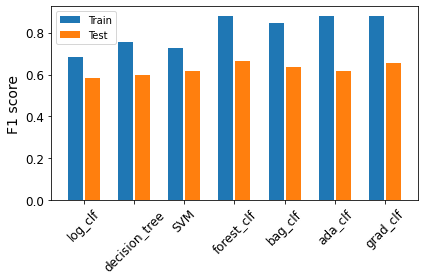

In [314]:
x = np.arange(len(performance))
width = 0.3
plt.ylabel('F1 score')
plt.bar(x - 0.17, performance.values(), width, label='Train')
plt.bar(x + 0.17, performance_test.values(), width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
_ = plt.legend()

save_fig('Performance of each model for prediction')

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]
print(val_mae)
print(test_mae)
plt.ylabel('mean_absolute_error [Target]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

save_fig('Performance of each model')

## Forecasting

In [ ]:
X_train_prepared.shape

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[2, 4]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train_prepared, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))